# 15 総合演習問題

## 総合演習問題6問

In [1]:
# 以下は必要なモジュールのため、あらかじめ読み込んでおいてください。
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd
import time

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習モジュール
import sklearn

## 15.1 総合演習問題
キーワード：教師あり学習、画像認識、複数カテゴリーの分類、混同行列

sklearnモジュールに入っているload_digitsを以下のようにして読み込み、各数字(0〜9)を予測するモデルを構築しましょう。このデータは、手書きの数字で、0から9までのテジタルデータです。数字のラベルがdigits.targetで、そのデータの特徴量はdigits.dataになります。その時にテストデータと学習データに分けて、モデルを構築し、混同行列の結果を表示させてください(train_test_splitのパラメータrandom_state=0で設定してください)。いくつかモデルを作成し、比較してみてください。どのモデルを使いますか。

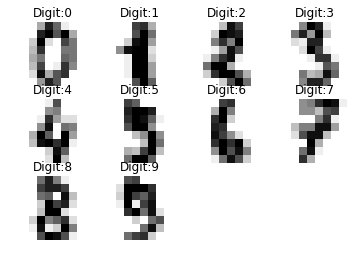

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# 分析対象データ
from sklearn.datasets import load_digits

digits = load_digits()

# 画像の表示
for label, img in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(3,4,label+1)
    plt.axis('off')
    plt.imshow(img,cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title('Digit:{0}'.format(label))

In [3]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, stratify = digits.target, random_state=0)

model = LogisticRegression()
clf = model.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix
pred_svc = clf.predict(X_test)

confusion_m = confusion_matrix(y_test,pred_svc)
print("Confution matrix:\n{}".format(confusion_m))

Confution matrix:
[[44  0  0  0  1  0  0  0  0  0]
 [ 0 44  0  0  0  1  0  0  1  0]
 [ 0  1 42  1  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  1  0]
 [ 0  2  0  0 42  0  0  0  1  0]
 [ 0  0  0  0  0 45  0  1  0  0]
 [ 0  1  0  0  0  0 44  0  0  0]
 [ 0  1  0  0  0  0  0 42  0  2]
 [ 0  3  0  1  0  0  0  0 39  0]
 [ 0  1  0  0  0  1  0  0  2 41]]


In [4]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier


X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, stratify = digits.target, random_state=0)

model=RandomForestClassifier(random_state=0)
clf = model.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix
pred_svc = clf.predict(X_test)

confusion_m = confusion_matrix(y_test,pred_svc)
print("Confution matrix:\n{}".format(confusion_m))

Confution matrix:
[[44  0  0  0  1  0  0  0  0  0]
 [ 0 45  1  0  0  0  0  0  0  0]
 [ 0  1 42  1  0  0  0  0  0  0]
 [ 0  0  0 42  0  0  1  1  2  0]
 [ 0  0  0  0 44  0  0  1  0  0]
 [ 0  0  0  0  1 43  0  0  1  1]
 [ 0  1  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 45  0  0]
 [ 0  2  1  0  0  0  1  0 37  2]
 [ 0  1  0  1  1  1  0  0  1 40]]


## 15.2 総合演習問題
キーワード：教師あり学習、回帰、複数モデルの比較

以下のデータを読み込み、アワビの年齢を予測するモデルを構築してみましょう。目的変数は、「Rings」になります。  
http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

参考URL：  
https://www.slideshare.net/hyperak/predicting-the-age-of-abalone　　
http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=1B4590990A8445EBC80996A092445868?doi=10.1.1.135.705&rep=rep1&type=pdf　　

In [5]:
abalone = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data", names=('sex', 'length', 'diameter', 'height', 'wholeweight', 'shuckedweight', 'visceraweight', 'shellweight', 'rings'))
abalone.head()

,sex,length,diameter,height,wholeweight,shuckedweight,visceraweight,shellweight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
abalone.groupby('rings').size()

rings
1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
dtype: int64

In [7]:
abalone_n = abalone.query('3 <= rings <= 24')

In [8]:
abalone_n.groupby('rings').size()

rings
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
dtype: int64

In [9]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    abalone_n.iloc[:,1:7], abalone_n['rings'], stratify = abalone_n['rings'], random_state=0)

f_model=RandomForestClassifier(random_state=0)
clf = f_model.fit(X_train,y_train)
print("train:",clf.__class__.__name__ ,clf.score(X_train,y_train))
print("test:",clf.__class__.__name__ , clf.score(X_test,y_test))

train: RandomForestClassifier 0.985289414775
test: RandomForestClassifier 0.238734419942


## 15.3 総合演習問題
キーワード：教師あり学習、分類、マーケティング分析、検証、混同行列、正解率、適合率、再現率、F1スコア、ROC曲線、AUC

以前に扱いました以下のデータをダウンロードして、データ（bank-full.csv）を読み込んで、後の問いに答えてください。（bank-full.csvが分析対象データになります。）

http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip

(1)  数値データ(age,balance,day,duration,campaign,pdays,previous)における基本統計量(レコード数、最大値、最小値、標準偏差など)を算出してください。  
(2)  データの"job","marital","education","default","housing","loan"のそれぞれについて、預金を申し込む人、申し込まない人の人数を算出してください。　　
(3)  y(預金を申し込む、申し込まない)を目的変数として、予測モデルを構築してください。モデルは複数（ロジスティック回帰、SVM、決定木、k-NN、ランダムフォレストなど）試してください。ただし、テスト用にデータはあらかじめ抜いてください(train_test_splitのパラメータrandom_state=0で設定してください)。     
(4)  テスト用のデータを使って、それぞれのモデルの検証をしましょう。各モデルのテストデータにおける正解率、適合率、再現率、F1スコア、混同行列を表示してください。どのモデルを使いますか。  
(5)  それぞれのモデルのROC曲線を引いて、AUCを算出し、比較できるようにしてください。

In [10]:
# webからデータを取得したり、zipファイルを扱うためのモジュール
import requests, zipfile
from io import StringIO
import io

# データがあるurl の指定
zip_file_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip"

# データをurlから取得する
r = requests.get(zip_file_url, stream=True)

# zipfileを読み込み展開する
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [11]:
bank = pd.read_csv("bank-full.csv", sep=';')
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [13]:
print(bank.groupby(('job','y')).size())
print(bank.groupby(('marital','y')).size())
print(bank.groupby(('education','y')).size())
print(bank.groupby(('default','y')).size())
print(bank.groupby(('housing','y')).size())
print(bank.groupby(('loan','y')).size())

job            y  
admin.         no     4540
               yes     631
blue-collar    no     9024
               yes     708
entrepreneur   no     1364
               yes     123
housemaid      no     1131
               yes     109
management     no     8157
               yes    1301
retired        no     1748
               yes     516
self-employed  no     1392
               yes     187
services       no     3785
               yes     369
student        no      669
               yes     269
technician     no     6757
               yes     840
unemployed     no     1101
               yes     202
unknown        no      254
               yes      34
dtype: int64
marital   y  
divorced  no      4585
          yes      622
married   no     24459
          yes     2755
single    no     10878
          yes     1912
dtype: int64
education  y  
primary    no      6260
           yes      591
secondary  no     20752
           yes     2450
tertiary   no     11305
           yes     1

In [14]:
from sklearn.preprocessing import label_binarize
bank["housing_bin"] = label_binarize(bank["housing"], classes=["no", "yes"])
bank["y_bin"] = label_binarize(bank["y"], classes=["no", "yes"])

In [15]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = bank[["age","balance","day","duration","campaign","pdays","previous","housing_bin"]]
Y = bank["y_bin"]

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, stratify = Y, random_state=0)

model = LogisticRegression()
clf = model.fit(X_train,y_train)

print("train result:",clf.score(X_train,y_train))
print("test result:" , clf.score(X_test,y_test))

train result: 0.889790020054
test result: 0.887728921525


In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score

pred_svc = clf.predict(X_test)

confusion_m = confusion_matrix(y_test,pred_svc)
print("Confution matrix:\n{}".format(confusion_m))

print("適合率:%.3f" % precision_score(y_true=y_test,y_pred=pred_svc))
print("再現率:%.3f" % recall_score(y_true=y_test,y_pred=pred_svc))
print("F1値:%.3f" % f1_score(y_true=y_test,y_pred=pred_svc))

Confution matrix:
[[9781  200]
 [1069  253]]
適合率:0.558
再現率:0.191
F1値:0.285


In [17]:
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

from sklearn import metrics
fpr_linear, tpr_linear, _ = metrics.roc_curve(y_test, pred_svc)
roc_auc_linear = auc(fpr_linear, tpr_linear)

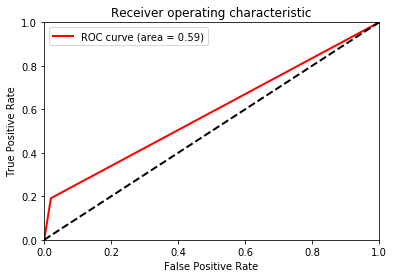

In [18]:
# 点のプロット
plt.plot(fpr_linear, tpr_linear, color='red',lw= 2, label='ROC curve (area = %0.2f)' % roc_auc_linear)

# ランダム
plt.plot([0, 1], [0, 1], color='black', lw= 2, linestyle='--')

# 範囲を絞る
plt.xlim([0, 1])
plt.ylim([0, 1])

#ラベルなど
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="best")

In [19]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier

X = bank[["age","balance","day","duration","campaign","pdays","previous","housing_bin"]]
Y = bank["y_bin"]

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, stratify = Y, random_state=0)

f_model=RandomForestClassifier(random_state=0)
clf = f_model.fit(X_train,y_train)

print("train:",clf.__class__.__name__ ,clf.score(X_train,y_train))
print("test:",clf.__class__.__name__ , clf.score(X_test,y_test))

train: RandomForestClassifier 0.98926507019
test: RandomForestClassifier 0.892329470052


In [20]:
pred_svc = clf.predict(X_test)

confusion_m = confusion_matrix(y_test,pred_svc)
print("Confution matrix:\n{}".format(confusion_m))

from sklearn.metrics import precision_score,recall_score,f1_score

print("適合率:%.3f" % precision_score(y_true=y_test,y_pred=pred_svc))
print("再現率:%.3f" % recall_score(y_true=y_test,y_pred=pred_svc))
print("F1値:%.3f" % f1_score(y_true=y_test,y_pred=pred_svc))

Confution matrix:
[[9684  297]
 [ 920  402]]
適合率:0.575
再現率:0.304
F1値:0.398


In [21]:
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

from sklearn import metrics
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test, pred_svc)
roc_auc_rf = auc(fpr_rf, tpr_rf)

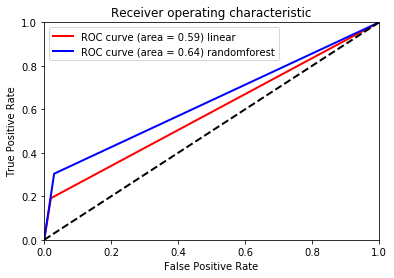

In [22]:
# 点のプロット
plt.plot(fpr_linear, tpr_linear, color='red',lw= 2, label='ROC curve (area = %0.2f) linear' % roc_auc_linear)
plt.plot(fpr_rf, tpr_rf, color='blue',lw= 2, label='ROC curve (area = %0.2f) randomforest' % roc_auc_rf)

# ランダム
plt.plot([0, 1], [0, 1], color='black', lw= 2, linestyle='--')

# 範囲を絞る
plt.xlim([0, 1])
plt.ylim([0, 1])

#ラベルなど
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="best")

## 15.4 総合演習問題
キーワード：教師あり学習、教師なし学習、ハイブリッドアプローチ

本講座の機械学習の章で扱ったload_breast_cancerを使って、さらに予測精度（正解率）を上げるモデルを作成してみましょう。同じく、テスト用にデータはあらかじめ抜いて検証してください(train_test_splitのパラメータrandom_state=0で設定してください)。   

In [23]:
# 前回の解答
# 標準化のためのモジュール
from sklearn.preprocessing import StandardScaler

# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

In [24]:
# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [25]:
from sklearn.metrics import confusion_matrix

model = LogisticRegression()
clf = model.fit(X_train_std,y_train)
print("train:",clf.__class__.__name__ ,clf.score(X_train_std,y_train))
print("test:",clf.__class__.__name__ , clf.score(X_test_std,y_test))

pred_y = clf.predict(X_test_std)
confusion_m = confusion_matrix(y_test,pred_y)

print("Confution matrix:\n{}".format(confusion_m))

train: LogisticRegression 0.990610328638
test: LogisticRegression 0.958041958042
Confution matrix:
[[50  3]
 [ 3 87]]


データを標準化して、
単純にモデルを当てはめるとテストデータで正解率95.8％でした。この結果を上回ることはできるでしょうか。

In [26]:
from sklearn.linear_model import LogisticRegressionCV
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

# 標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ロジスティック回帰で学習
logistic = LogisticRegressionCV(cv=10, random_state=0)
logistic.fit(X_train_scaled, y_train)

# 検証
print("train:",clf.__class__.__name__ ,(logistic.score(X_train_scaled, y_train)))
print("test:",clf.__class__.__name__ ,(logistic.score(X_test_scaled, y_test)))
print('Confusion matrix:\n{}'.format(confusion_matrix(y_true=y_test, y_pred=logistic.predict(X_test_scaled))))

train: LogisticRegression 0.990610328638
test: LogisticRegression 0.965034965035
Confusion matrix:
[[50  3]
 [ 2 88]]


## 15.5 総合演習問題
キーワード：時系列データ、欠損データの補完、シフト、ヒストグラム、教師あり学習

以下のように、2001年1月2日から2016年12月30日までの為替データ（JPYUSDとUSDEUR）を読み込み、問いに答えてください。

(1)読み込んだデータには、祝日や休日等による欠損（NaN）があります。その補完処理をするために、直近の前の日におけるデータで補完してください。ただし年月のデータがない場合もありますので、その場合、今回は無視してください（改めて日付データを作成して、分析をすることも可能ですが、今回はこのアプローチはとりません。）。  
(2)上記のデータで、各統計量の確認と時系列のグラフ化をしてください。  
(3)当日と前日における差分をとり、それぞれの変化率（当日-前日）/前日のデータをヒストグラムで表示してください。　　  
(4)将来の価格（例：次の日）を予測するモデルを構築してみましょう。具体的には、2016年11月を訓練データとして、当日の価格を目的変数として、前日、前々日、3日前の価格データを使ってモデル（線形回帰）を構築し、2016年12月をテストデータとして、検証してください。また、他の月や年で実施すると、どんな結果になりますか。  

**pip install pandas-datareaderで、モジュールをあらかじめダウンロードしてください。jupyterの右上にあるterminalで実行できます。**

In [27]:
import pandas_datareader.data as pdr

start_date = "2001/1/2"
end_date = "2016/12/30"

fx_jpusdata = pdr.DataReader("DEXJPUS","fred",start_date,end_date)
fx_useudata = pdr.DataReader("DEXUSEU","fred",start_date,end_date)

In [28]:
fx_jpusdata.describe()

,DEXJPUS
count,4020.000000
mean,105.786572
std,14.595934
min,75.720000
25%,95.460000
50%,108.110000
75%,118.160000
max,134.770000


In [29]:
fx_jpusdata = fx_jpusdata.fillna(method="ffill")
fx_jpusdata.describe()

,DEXJPUS
count,4174.000000
mean,105.775220
std,14.612526
min,75.720000
25%,95.365000
50%,108.105000
75%,118.195000
max,134.770000


In [30]:
fx_useudata.describe()

,DEXUSEU
count,4020.000000
mean,1.239895
std,0.165370
min,0.837000
25%,1.128175
50%,1.274800
75%,1.352725
max,1.601000


In [31]:
fx_useudata = fx_useudata.fillna(method="ffill")
fx_useudata.describe()

,DEXUSEU
count,4174.000000
mean,1.239633
std,0.165265
min,0.837000
25%,1.128100
50%,1.274700
75%,1.352575
max,1.601000


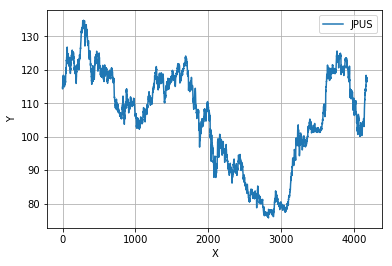

In [32]:
data_x = np.arange(4174)

plt.plot(data_x,fx_jpusdata,label="JPUS")
plt.legend()

plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)

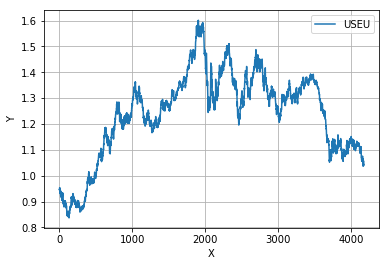

In [33]:
data_x = np.arange(4174)

plt.plot(data_x,fx_useudata,label="USEU")
plt.legend()

plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)

In [34]:
fx_jpusdata["sh"] = fx_jpusdata.shift(1)
fx_jpusdata["var"] = (fx_jpusdata["DEXJPUS"] - fx_jpusdata["sh"]) / fx_jpusdata["sh"]
fx_jpusdata.head()

,DEXJPUS,sh,var
DATE,,,
2001-01-02,114.73,NaN,NaN
2001-01-03,114.26,114.73,-0.004097
2001-01-04,115.47,114.26,0.010590
2001-01-05,116.19,115.47,0.006235
2001-01-08,115.97,116.19,-0.001893


/Users/macakiroppongi/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/macakiroppongi/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


(array([  0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   6.00000000e+00,
          7.00000000e+00,   1.20000000e+01,   4.80000000e+01,
          1.38000000e+02,   3.65000000e+02,   7.53000000e+02,
          1.42000000e+03,   8.30000000e+02,   3.87000000e+02,
          1.24000000e+02,   4.40000000e+01,   1.70000000e+01,
          8.00000000e+00,   5.00000000e+00,   4.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00]),
 array([-0.05 , -0.046, -0.042, -0.038, -0.034, -0.03 , -0.026, -0.022,
        -0.018, -0.014, -0.01 , -0.006, -0.002,  0.002,  0.006,  0.01 ,
         0.014,  0.018,  0.022,  0.026,  0.03 ,  0.034,  0.038,  0.042,
         0.046,  0.05 ]),
 <a list of 25 Patch objects>)

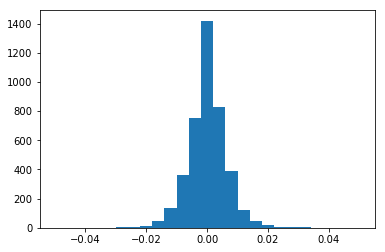

In [35]:
plt.hist(fx_jpusdata["var"], bins=25, range=(-0.05, 0.05))

In [36]:
fx_useudata["sh"] = fx_useudata.shift(1)
fx_useudata["var"] = (fx_useudata["DEXUSEU"] - fx_useudata["sh"]) / fx_useudata["sh"]
fx_useudata.head()

,DEXUSEU,sh,var
DATE,,,
2001-01-02,0.9465,NaN,NaN
2001-01-03,0.9473,0.9465,0.000845
2001-01-04,0.9448,0.9473,-0.002639
2001-01-05,0.9535,0.9448,0.009208
2001-01-08,0.9486,0.9535,-0.005139


/Users/macakiroppongi/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/macakiroppongi/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   3.00000000e+00,
          4.00000000e+00,   1.80000000e+01,   5.70000000e+01,
          1.52000000e+02,   3.50000000e+02,   7.61000000e+02,
          1.41800000e+03,   8.21000000e+02,   3.74000000e+02,
          1.51000000e+02,   4.10000000e+01,   1.30000000e+01,
          5.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([-0.05 , -0.046, -0.042, -0.038, -0.034, -0.03 , -0.026, -0.022,
        -0.018, -0.014, -0.01 , -0.006, -0.002,  0.002,  0.006,  0.01 ,
         0.014,  0.018,  0.022,  0.026,  0.03 ,  0.034,  0.038,  0.042,
         0.046,  0.05 ]),
 <a list of 25 Patch objects>)

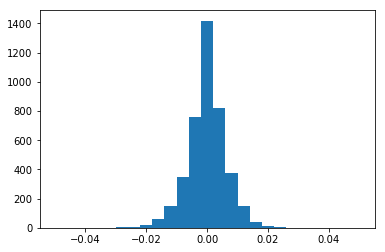

In [37]:
plt.hist(fx_useudata["var"], bins=25, range=(-0.05, 0.05))

In [38]:
fx_jpusdata["-2"] = fx_jpusdata["sh"].shift(1)
fx_jpusdata["-3"] = fx_jpusdata["-2"].shift(1)
fx_jpusdata.head()

,DEXJPUS,sh,var,-2,-3
DATE,,,,,
2001-01-02,114.73,NaN,NaN,NaN,NaN
2001-01-03,114.26,114.73,-0.004097,NaN,NaN
2001-01-04,115.47,114.26,0.010590,114.73,NaN
2001-01-05,116.19,115.47,0.006235,114.26,114.73
2001-01-08,115.97,116.19,-0.001893,115.47,114.26


In [39]:
fx_jpusdata.reset_index(drop=False).head()

,DATE,DEXJPUS,sh,var,-2,-3
0,2001-01-02,114.73,NaN,NaN,NaN,NaN
1,2001-01-03,114.26,114.73,-0.004097,NaN,NaN
2,2001-01-04,115.47,114.26,0.010590,114.73,NaN
3,2001-01-05,116.19,115.47,0.006235,114.26,114.73
4,2001-01-08,115.97,116.19,-0.001893,115.47,114.26


In [40]:
fx_jpusdata_11 = fx_jpusdata.query('"2016-11-01" <= DATE <= "2016-11-30"')

In [41]:
fx_jpusdata_12 = fx_jpusdata.query('"2016-12-01" <= DATE <= "2016-12-27"')

In [42]:
fx_jpusdata_11["y"] = fx_jpusdata_11["DEXJPUS"] * 100
fx_jpusdata_12["y"] = fx_jpusdata_12["DEXJPUS"] * 100

/Users/macakiroppongi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/macakiroppongi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train = fx_jpusdata_11[["sh","-2","-3"]]
X_test = fx_jpusdata_12[["sh","-2","-3"]]
y_train = fx_jpusdata_11["y"]
y_test = fx_jpusdata_12["y"]

model = LogisticRegression()
clf = model.fit(X_train,y_train)

print("train result:",clf.score(X_train,y_train))
print("test result:" , clf.score(X_test,y_test))

train result: 0.272727272727
test result: 0.0


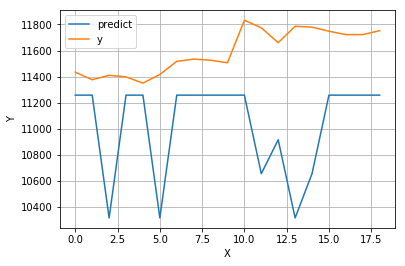

In [44]:
data_x = np.arange(19)
pred = clf.predict(X_test)

plt.plot(data_x,pred,label="predict")
plt.plot(data_x,y_test,label="y")
plt.legend()

plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)

In [45]:
fx_jpusdata_1 = fx_jpusdata.query('"2016-03-01" <= DATE <= "2016-03-31"')
fx_jpusdata_2 = fx_jpusdata.query('"2016-04-01" <= DATE <= "2016-04-30"')
fx_jpusdata_1["y"] = fx_jpusdata_1["DEXJPUS"] * 100
fx_jpusdata_2["y"] = fx_jpusdata_2["DEXJPUS"] * 100

/Users/macakiroppongi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/macakiroppongi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [46]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train = fx_jpusdata_1[["sh","-2","-3"]]
X_test = fx_jpusdata_2[["sh","-2","-3"]]
y_train = fx_jpusdata_1["y"]
y_test = fx_jpusdata_2["y"]

model = LogisticRegression()
clf = model.fit(X_train,y_train)

print("train result:",clf.score(X_train,y_train))
print("test result:" , clf.score(X_test,y_test))

train result: 0.260869565217
test result: 0.0


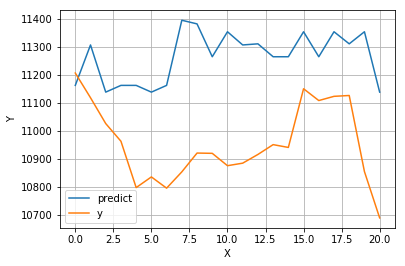

In [47]:
data_x = np.arange(21)
pred = clf.predict(X_test)

plt.plot(data_x,pred,label="predict")
plt.plot(data_x,y_test,label="y")
plt.legend()

plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)

## 15.6 総合演習問題
キーワード：時系列データ、回帰分析

以下のデータを取得し、読み込んで以下の問いに答えてください。ただし、今回は2000年より前のデータ(1987~1999)を分析対象とします。

http://stat-computing.org/dataexpo/2009/the-data.html


**注：なお、現在のilectでは、たくさんのユーザーさんに使っていただくために、環境に制限等があります。ですので、以下のコード(Python)はilectではメモリーエラー等になってしまいますが、ある程度のスペックPCであればローカルで実行できますので、参考にしてください。ただし、必要な情報のみ抽出して計算するなどしていけば、実行可能だと思いますので、やってみてください。**

(1)データを読み込んだ後は、年×月の平均遅延時間を算出してください。何かわかることはありますか。  
(2)(1)で算出したデータについて、1月から12月までの結果を時系列の折れ線グラフにしてください。その時、年ごとに比較できるように、１つのグラフにまとめてください。（なので、1987年から1999年までのデータについて、それぞれの時系列グラフが並ぶイメージです。）  
(3)各航空会社（UniqueCarrier）ごとの平均遅延時間を算出してください。また、出発地(Origin)、目的地(Dest)を軸にして、平均遅延時間を算出してください。  
(4)遅延時間を予測するための予測モデルを構築します。目的変数をDepDelay、説明変数をArrDelayとDistanceにして、モデルを構築しましょう。

In [48]:
data_1987 = pd.read_csv("1987.csv")
data_1988 = pd.read_csv("1988.csv")
data_1989 = pd.read_csv("1989.csv")
data_1987.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1987,10,14,3,741.0,730,912.0,849,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1987,10,15,4,729.0,730,903.0,849,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1987,10,17,6,741.0,730,918.0,849,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1987,10,18,7,729.0,730,847.0,849,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1987,10,19,1,749.0,730,922.0,849,PS,1451,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [49]:
fl_data = pd.concat([data_1988, data_1989])
fl_data.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,TailNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.024330e+07,1.024330e+07,1.024330e+07,1.024330e+07,1.011897e+07,1.024330e+07,1.008969e+07,1.024330e+07,1.024330e+07,0.0,...,0.0,0.0,1.024330e+07,0.0,1.024330e+07,0.0,0.0,0.0,0.0,0.0
mean,1.988492e+03,6.513811e+00,1.573333e+01,3.955433e+00,1.364313e+03,1.356564e+03,1.495450e+03,1.495024e+03,7.297690e+02,NaN,...,NaN,NaN,1.213750e-02,NaN,2.857967e-03,NaN,NaN,NaN,NaN,NaN
std,4.999383e-01,3.457142e+00,8.790269e+00,1.990601e+00,4.767994e+02,4.705517e+02,4.955112e+02,4.844973e+02,5.525857e+02,NaN,...,NaN,NaN,1.094997e-01,NaN,5.338351e-02,NaN,NaN,NaN,NaN,NaN
min,1.988000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,...,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,1.988000e+03,3.000000e+00,8.000000e+00,2.000000e+00,9.440000e+02,9.390000e+02,1.118000e+03,1.117000e+03,3.090000e+02,NaN,...,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
50%,1.988000e+03,7.000000e+00,1.600000e+01,4.000000e+00,1.340000e+03,1.335000e+03,1.522000e+03,1.520000e+03,6.060000e+02,NaN,...,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
75%,1.989000e+03,1.000000e+01,2.300000e+01,6.000000e+00,1.750000e+03,1.740000e+03,1.918000e+03,1.914000e+03,1.025000e+03,NaN,...,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
max,1.989000e+03,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,9.368000e+03,NaN,...,NaN,NaN,1.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN


In [50]:
fl_delay = fl_data.groupby(('Year','Month'))["DepDelay"].mean().values.reshape(2,12)

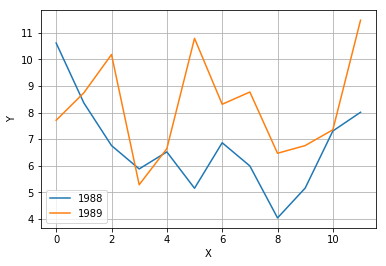

In [51]:
data_x = np.arange(12)

plt.plot(data_x,fl_delay[0,:],label="1988")
plt.plot(data_x,fl_delay[1,:],label="1989")
plt.legend()

plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)

In [52]:
fl_delay_UC = fl_data.groupby('UniqueCarrier')["DepDelay"].mean()
fl_delay_UC

UniqueCarrier
AA        6.410923
AS        5.873043
CO        7.889590
DL        5.836691
EA        8.588926
HP        4.911289
NW        5.742895
PA (1)    7.043376
PI        9.842522
PS        4.622253
TW        7.247705
UA        9.098209
US        9.371142
WN        7.235515
Name: DepDelay, dtype: float64

In [53]:
pd.pivot_table(fl_data, index='Origin', columns='Dest', values='DepDelay')

Dest,ABE,ABQ,ACV,ACY,AGS,ALB,ALO,AMA,ANC,APF,...,TVC,TVL,TYS,UCA,VPS,WRG,YAK,YAP,YKM,YUM
Origin,,,,,,,,,,,,,,,,,,,,,
ABE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.420031,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMA,NaN,4.549701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
print("isnan_ArrDelay",np.isnan(fl_data["ArrDelay"]).any())
print("isinf_ArrDelay",np.isinf(fl_data["ArrDelay"]).any())
print("isnan_Distance",np.isnan(fl_data["Distance"]).any())
print("isinf_Distance",np.isinf(fl_data["Distance"]).any())
print("isnan_DepDelay",np.isnan(fl_data["DepDelay"]).any())
print("isinf_DepDelay",np.isinf(fl_data["DepDelay"]).any())

isnan_ArrDelay True
isinf_ArrDelay False
isnan_Distance True
isinf_Distance False
isnan_DepDelay True
isinf_DepDelay False


In [55]:
fl_data_dna = fl_data.dropna(subset=['ArrDelay', 'Distance', 'DepDelay'])

In [56]:
print("isnan_ArrDelay",np.isnan(fl_data_dna["ArrDelay"]).any())
print("isinf_ArrDelay",np.isinf(fl_data_dna["ArrDelay"]).any())
print("isnan_Distance",np.isnan(fl_data_dna["Distance"]).any())
print("isinf_Distance",np.isinf(fl_data_dna["Distance"]).any())
print("isnan_DepDelay",np.isnan(fl_data_dna["DepDelay"]).any())
print("isinf_DepDelay",np.isinf(fl_data_dna["DepDelay"]).any())

isnan_ArrDelay False
isinf_ArrDelay False
isnan_Distance False
isinf_Distance False
isnan_DepDelay False
isinf_DepDelay False


In [57]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    fl_data_dna[["ArrDelay","Distance"]], fl_data_dna["DepDelay"], random_state=0)

In [ ]:
model = LogisticRegression()
clf = model.fit(X_train,y_train)

print("train result:",clf.score(X_train,y_train))
print("test result:" , clf.score(X_test,y_test))

### **ヒント**

データの取得は、以下のスクリプトを参考に、実装と実行をしてください。ただし、以下を実行する場合は別ファイルとして、「ファイル名.sh」の形式で保存し、そのファイルをここで実行する場合は、「bash ファイル名.sh」で実行します。もしくは、terminalに移動し、専用のディレクトリなどを作って、スクリプトを実行して、データを取得してください。他、Pythonから取得する方法もありますし、以前はzipを展開してデータを読み込んでいましたが、zipのまま加工できるプログラムも書けますので、ぜひ調べてやってみてください。** なお、dataのダウンロードにとても時間がかかりますので、注意しましょう。**

## 参考：今後のデータ分析に向けて

以下は参考ですが、次のようなオープンデータを使って、データ分析に取り組んでみましょう。課題は明確になっていませんが、その課題を見つけることもデータ分析では大事です。

1. どのデータを分析対象にしますか？また、どんなことを目的にデータを分析しますか？どんなことをゴールにしますか？    
2. 分析対象となるデータに何か特徴や傾向はありますか？簡易集計してみましょう。そこからどんな仮設を立てますか？  
3. 目的や仮説等が明確になったら、どんな風にアプローチしますか？実装して、検証してください。  
4. 分析に明るくない人たち(中学までの数学しかわからないと想定)に今回の分析結果を報告するとして、どのような報告書（グラフやインサイトなど含む）を作成しますか？

なお、課題を特定していくことの重要性については、以下の本も参考になりますので、興味のある方は読んでみてください。

>[参考文献]

>『イシューからはじめよ―知的生産の「シンプルな本質」』(安宅和人 (著)、英治出版)

##### データソースサンプル（他のデータソースでも構いません）

- UCI DATA

http://archive.ics.uci.edu/ml/

- Bay Area Bike Share

http://www.bayareabikeshare.com/open-data
　　
- movielens

http://grouplens.org/datasets/movielens/


- MLDATA

http://mldata.org/

- Churn Data Set(provided by IBM)　　

https://community.watsonanalytics.com/wp-content/uploads/2015/03/WA_Fn-UseC_-Telco-Customer-Churn.csv

- Netflix Prize Data Set　　

http://academictorrents.com/details/9b13183dc4d60676b773c9e2cd6de5e5542cee9a　　